In [36]:
import pydataset as data
from pydataset import data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

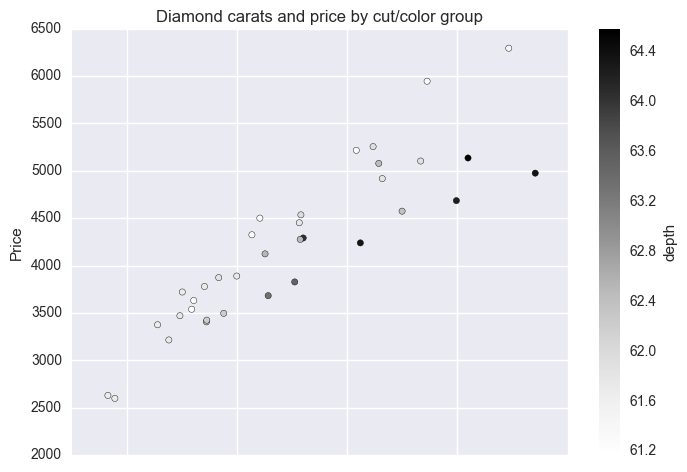

In [37]:
## Problem 1

diamonds = data('diamonds')
diamonds.head()
cuts = diamonds.groupby("cut")
cuts.describe()
Fair = cuts.get_group("Fair")
Good = cuts.get_group("Good")
Ideal = cuts.get_group("Ideal")
Premium = cuts.get_group("Premium")
V_Good = cuts.get_group("Very Good")

cut_color = diamonds.groupby(['cut','color'])
means = cut_color.mean()

means.plot.scatter(x='carat', y='price', c='depth')
plt.title("Diamond carats and price by cut/color group")
plt.xlabel("Carats")
plt.ylabel("Price")
plt.show()



We can see from the plot above that when we take the mean of each cut and color group, the groups that have more carats often have a higher price as well. We note as well that the amount of variation between prices increase as the amount of carats in the diamond increases. We also add the dimension of average depth and note that most of the diamonds of a higher depth are in the higher carat and price groups, but that within the same number of carats, a greater depth does not necessarily mean a higher price.

In [52]:
## Problem 2

titanic = pd.read_csv('titanic.csv', header=0)
titanic = titanic[['Survived','Pclass','Sex','Age','Fare','Embarked']]

#1. Using a groupby() call, see what the survival rates of the passengers were based on where they embarked from (embark_town).
origins = titanic.groupby("Embarked")
print(origins.mean()['Survived'])
print("")

#2. Next, create a pivot table to further look at survival rates based on both place of embarkment and gender.
print(titanic.pivot_table('Survived',index='Embarked',columns='Sex'))
print("")

#3. Find 2 more pivot tables to investigate the claim.
age = pd.cut(titanic['Age'], [0,12,18,80])
print(titanic.pivot_table('Survived',index='Embarked',columns=age))
print("")

print(titanic.pivot_table('Survived',index='Embarked',columns="Pclass"))
print("")

print(origins.mean()['Pclass'])


Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

Sex         female      male
Embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144

Age        (0, 12]  (12, 18]  (18, 80]
Embarked                              
C         0.812500  0.666667   0.60000
Q         0.000000  0.500000   0.25641
S         0.561644  0.333333   0.33752

Pclass         1.0       2.0       3.0
Embarked                              
C         0.687943  0.571429  0.366337
Q         0.666667  0.285714  0.353982
S         0.559322  0.417355  0.210101

Embarked
C    1.851852
Q    2.894309
S    2.347921
Name: Pclass, dtype: float64


The analysis suggests that there were indeed differences in survival rate based on the place where the passengers embarked. In particular, the C origin had the highest survival rates. This remained true even when we divided by gender, age categories, and passenger class. One explanation is that more people from the C origin were in higher classes, as suggested by the average passenger class of each origin. However, even when we split the data sets by class and origin, the C origin had the highest survival rate for all passenger classes.